In [1]:
%matplotlib notebook

In [2]:
import cv2

# Python podstawy, część 2: projekt - wczytaj, wyświetl i przekształć obraz



Drugi projekt dotyczy przetwarzania obrazów (a nie tekstu, tak jak pierwszy). Tym razem musisz przygotować listę plików w folderze znanym z ćwiczenia 2 i wybrać spośród nich plik graficzny, z rozszerzeniem .jpg.

Odczytanie pliku graficznego z poziomu programu nie jest takie proste i najpierw musimy utworzyć ku temu specjalne środowisko. Biblioteki, które będziemy używać to opencv (używana do obróbki i analizy obrazów), matplotlib (używana do wyświetlania danych) oraz numpy (operacje matematyczne), pamiętaj również o notebook żeby pracować w notatnikach Jupyter.

Z tego względu utworzone zostanie specjalne środowisko conda: image_processing. Moduły pobierane będą z kanału **conda-forge**

Po jego utworzeniu i instalacji potrzebnych bibliotek, można przejść do obróbki obrazu.

## Projekt 2 / Etap 1: import bibliotek i wczytanie obrazu

Na początku musisz zaimportować wszystkie potrzebne biblioteki. Tym razem import przebiegać będzie inaczej niż zwykle, ponieważ nie potrzebujemy "całej" biblioteki a tylko jej moduł lub pojedyncze funkcje. Bibliotekę opencv zaimportujemy w całości, podobnie numpy (import cv2, import numpy). Różnicą jest biblioteka matplotlib. Nie potrzebujemy jej całej - wystarczy jeden moduł "pyplot".

Moglibyśmy zawsze pisać ręcznie:

matplotlib.pyplot.funkcja_wyswietlajaca_obraz(parametry funkcji)

Ale możemy też pisać:

plt.funkcja_wyswietlajaca_obraz(parametry funkcji)

Oszczędzamy w ten sposób miejsce. Jak matplotlib.pyplot zostaje przekształcone do plt? Odpowiedź tkwi w importowaniu:

> import matplotlib.pyplot as plt

Co oznacza: zaimportuj moduł pyplot z biblioteki matplotlib i nazwij go "plt" (moglibysmy nazwać go jakkolwiek, równie dobrze "rysuj", "xyz", "my_module", ale konwencjonalnie przyjęło się nazywanie go jako "plt".

* Twoim zadaniem jest import: opencv, numpy i matplotlib.pyplot

In [3]:
import cv2
import numpy
import matplotlib.pyplot as plt

Następny krok to zadanie znane z poprzedniego: wczytaj listę plików z folderu pliki i ją wyświetl po czym zbuduj ścieżkę do pliku jpg z obrazem. Pamiętaj o imporcie potrzebnej biblioteki.

In [7]:
import os

def znajdz_obraz(pliki):
    for plik in pliki:
        if '.jpg' in plik:
            return plik
    return 0

folder = 'pliki/'
lista_plikow = os.listdir(folder)
plik_z_obrazem = znajdz_obraz(lista_plikow)
print(plik_z_obrazem)

Liasis_mackloti_savuensis_3.jpg


Ostatni krok to wczytanie obrazu do pamięci programu. Do tej operacji musisz wykorzystać bibliotekę opencv i jej funkcję **imread(adres_do_pliku_graficznego)**. https://docs.opencv.org/3.0-beta/modules/imgcodecs/doc/reading_and_writing_images.html?highlight=imread#cv2.imread

In [9]:
sciezka_obrazu = os.path.join(folder, plik_z_obrazem)
obraz = cv2.imread(sciezka_obrazu)

In [23]:
obraz.shape

(2348, 2400, 3)

By upewnić się, czy obraz został wczytany poprawnie możemy sprawdzić jego wymiary w pikselach i liczbę kanałów, pisząc: **nazwa_zmiennej_przechowującej_obraz.shape**

## Projekt 2 / Etap 2: wyświetlenie obrazu

Obraz możemy wyświetlić dwojako. Albo używając **matplotlib.pyplot** jako bazy albo funkcji **imshow** z biblioteki OpenCV. Ze względu na to, że pracujemy w notatniku Jupytera, wykorzystamy funkcje z biblioteki matplotlib.

Spróbuj najpierw wyświetlić obraz wykorzystując konstrukcję podaną niżej:

<IPython.core.display.Javascript object>


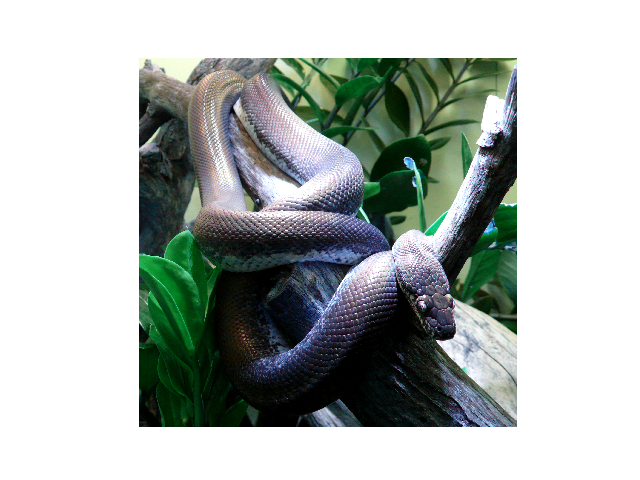

In [13]:
plt.figure()  # przestrzeń robocza
plt.axis("off")  # osie wyłączone
plt.imshow(obraz)  # przedstawienie obrazu
plt.show()  # naniesienie obrazu

Nie wszystko jednak się zgadza... Kolory na ilustracji są podmienione, tzn: kanał czerwony jest zamieniony z niebieskim (zielone liście nadal są zielone bo kanał zielony jest "w środku"). Bardziej technicznie rzecz ujmując:

- OpenCV wczytuje zdjęcia kolorowe jako zbiór kanałów: Niebieski-Zielony-Czerwony (BGR)
- Matplotlib wyświetla zdjęcia kolorowe jako zbiór kanałów: Czerwony-Zielony-Niebieski (RGB)

Musimy więc zamienić kanały miejscami. Spróbujemy to zrobić ręcznie przez adresowanie! Na początku stwórzmy trzy zmienne dla każdego kanału osobno. Dla przykładu kanał Niebieski (Blue) wyekstrahowany ze zdjęcia:

<IPython.core.display.Javascript object>


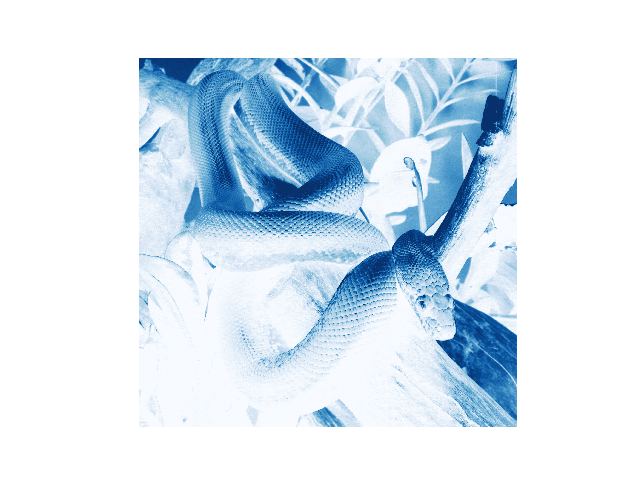

In [16]:
blue_img = obraz[:, :, 0]  # Co oznacza - wszystkie piksele wysokości, wszystkie piksele szerokości, kanał 1

plt.figure()
plt.axis("off")
plt.imshow(blue_img, cmap='Blues')  # parametr cmap oznacza kolorowanie pikseli. Być może "Blues" byłby lepszy?
plt.show()

<IPython.core.display.Javascript object>


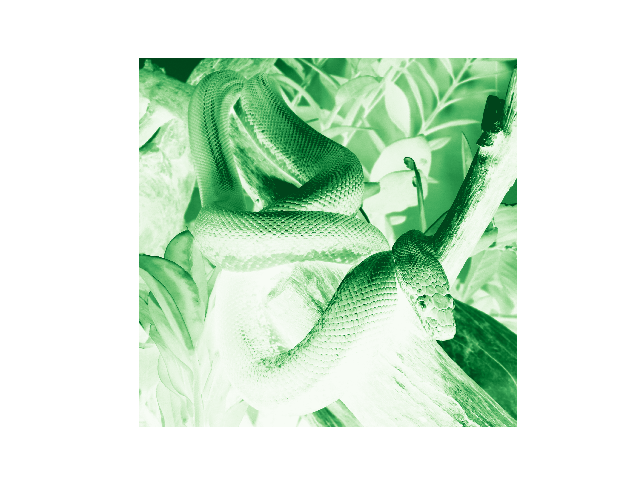

In [17]:
# Kanał zielony

green_img = obraz[:, :, 1]  # Co oznacza - wszystkie piksele wysokości, wszystkie piksele szerokości, kanał 1

plt.figure()
plt.axis("off")
plt.imshow(green_img, cmap='Greens')  # parametr cmap oznacza kolorowanie pikseli. Być może "Blues" byłby lepszy?
plt.show()

<IPython.core.display.Javascript object>


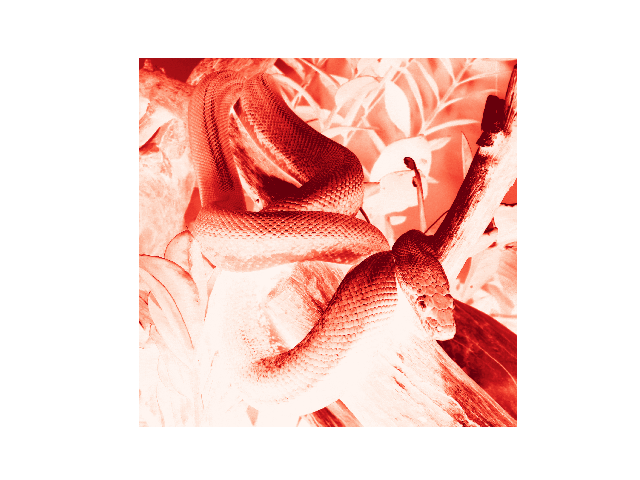

In [18]:
# Kanał czerwony

red_img = obraz[:, :, 2]  # Co oznacza - wszystkie piksele wysokości, wszystkie piksele szerokości, kanał 1

plt.figure()
plt.axis("off")
plt.imshow(red_img, cmap='Reds')  # parametr cmap oznacza kolorowanie pikseli. Być może "Blues" byłby lepszy?
plt.show()

Kiedy mamy już trzy kanały, to możemy je zamienić miejscami dzięki operacjom przeprowadzanym w bibliotece numpy. Jak to zrobić? Ustawiamy nowe kanały w liście: [kanał czerowny, kanał zielony, kanał niebieski] i przekształcamy tę listę w macierz numpy, która jest obsługiwana przez matplotlib. Przekształcenie w macierz numpy odbywa się dzięki poleceniu: numpy.dstack([lista kanałów]). Spróbuj to zrobić i wyświetlić wynikowy obraz!

In [21]:
lista_kanalow = [red_img, green_img, blue_img]
poprawiony_obraz = numpy.dstack(lista_kanalow)

<IPython.core.display.Javascript object>


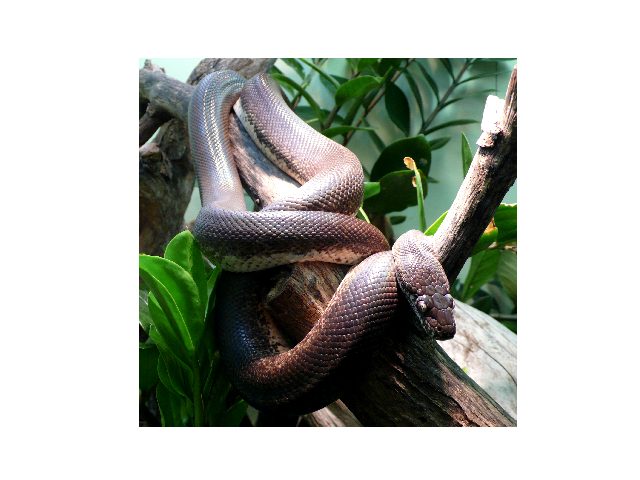

In [24]:
plt.figure()  # przestrzeń robocza
plt.axis("off")  # osie wyłączone
plt.imshow(poprawiony_obraz)  # przedstawienie obrazu
plt.show()  # naniesienie obrazu

In [ ]:
# Wyświetlenie RGB

## Projekt 2 / Etap 3: zapisanie obrazu

Ostatnim zadaniem jest zapisanie obrazu. Tym razem obędzie się bez podpowiedzi, tylko wytyczne:

- obraz ma zostać zapisany w folderze pliki, musisz więc przygotować ścieżkę do niego
- obraz ma zostac zapisany jako waz.jpg
- do zapisu wykorzystaj funkcję imwrite opencv https://docs.opencv.org/3.0-beta/modules/imgcodecs/doc/reading_and_writing_images.html#imwrite

In [25]:
folder

'pliki/'

In [26]:
waz = 'waz.jpg'
adres_zapisu = os.path.join(folder, waz)
cv2.imwrite(adres_zapisu, poprawiony_obraz)

True